In [ ]:
import pandas as pd
import numpy as np
import plotnine as p9
import plotnine.options as p9options

In [ ]:
root_results_dir = "/projects/genomic-ml/da2343/ml_project_1/algo_comparison/results"

# date_time = "2023-03-06_17:34"
# date_time = "2023-03-22_17:46"
# date_time = "2023-03-22_18:45"
# date_time = "2023-03-22_19:15"
# date_time = "2023-04-03_18:15"
# date_time = "2023-04-03_18:31"
date_time = "2023-03-22_18:12"
date_time = "2023-03-22_19:01"
date_time = "2023-04-10_11:18"
date_time = "2023-04-10_12:28"

# date_time = "2023-04-10_17:47"
date_time = "2023-04-10_15:31"
date_time = "2023-05-29_12:40"
date_time = "2023-06-21_17:26"
date_time = "2023-06-21_19:01"
date_time = "2023-06-28_13:01"
# date_time = "2023-07-19_20:27"
date_time = "2023-07-20_16:36"

# NECROMASS DF
# date_time = "2023-07-20_16:44"
# date_time = "2023-08-03_18:13"
date_time = "2023-08-18_14:28"
date_time = "2023-08-18_14:28"
date_time = "2023-09-15_18:01"
# date_time = "2023-09-15_20:03"
# date_time = "2023-10-02_08:20"
# date_time = "2023-10-02_08:33"
# date_time = "2023-10-02_09:44"
date_time = "2023-10-02_11:20"
date_time = "2023-10-02_14:35"
date_time = "2023-10-02_18:42"
date_time = "2023-10-10_09:23"
date_time = "2023-10-10_10:37"
date_time = "2023-10-12_22:17"
date_time = "2024-02-05_08:41"


error_df = pd.read_csv(f"{root_results_dir}/{date_time}_results.csv")
error_df

In [36]:
df_mean = error_df.groupby(['Dataset', 'Algorithm', '# of Total Samples']).mean().reset_index()
df_std = error_df.groupby(['Dataset', 'Algorithm', '# of Total Samples']).std().reset_index()
df_mean = df_mean.drop(columns=['FoldID', 'Index of Subsample', 'Index of Predicted Column'])
df_std = df_std.rename(columns={"Mean Squared Error": "std"})
df_std = df_std["std"] * 0.1
df = pd.concat([df_mean, df_std], axis=1)
df["ymin"] = df["Mean Squared Error"] - df["std"]
df["ymax"] = df["Mean Squared Error"] + df["std"]
df

# remove "Dec22" from the dataset names
df["Dataset"] = df["Dataset"].str.replace("Dec22_", "")
df

,Dataset,Algorithm,# of Total Samples,Mean Squared Error,std,ymin,ymax
0,all_log,Featureless,10,0.670806,0.059934,0.610872,0.730740
1,all_log,Featureless,20,0.619958,0.044625,0.575333,0.664583
2,all_log,Featureless,30,0.602210,0.033806,0.568404,0.636015
3,all_log,Featureless,40,0.601032,0.028379,0.572653,0.629411
4,all_log,Featureless,50,0.602125,0.030498,0.571627,0.632623
...,...,...,...,...,...,...,...
115,same_soil_power,LASSO,20,1.010659,0.084955,0.925704,1.095614
116,same_soil_power,Pearson,10,0.883351,0.074830,0.808521,0.958180
117,same_soil_power,Pearson,20,0.885259,0.064877,0.820382,0.950137
118,same_soil_power,Spearman,10,0.917877,0.079118,0.838759,0.996994


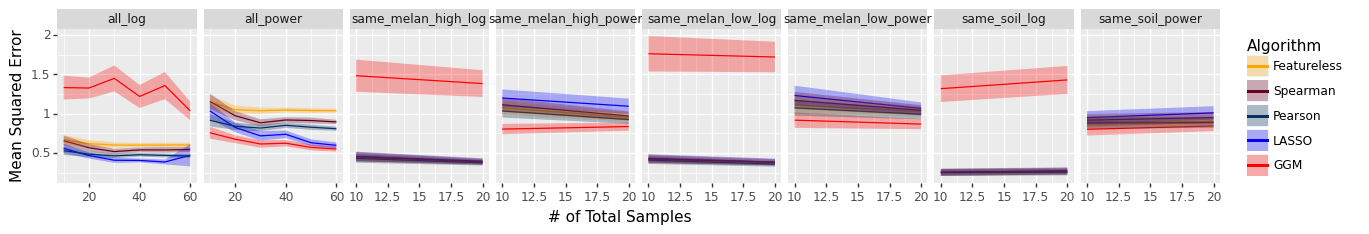

In [37]:
from plotnine import *
import plotnine.options as p9options
p9options.figure_size = (15, 2)

colors = ["orange", "#67001f", "#053061", "blue", "red"]
p = ggplot(df)
p = p + aes(x="# of Total Samples", y="Mean Squared Error", ymin="ymin", ymax="ymax", fill="Algorithm")
p = p + facet_grid("~Dataset", scales="free")
p = p + geom_line(aes(color="Algorithm"))
p = p + geom_ribbon(alpha=0.3)
p = p + scale_fill_manual(breaks=["Featureless", "Spearman", "Pearson", "LASSO", "GGM"], values=colors)
p = p + scale_color_manual(breaks=["Featureless", "Spearman", "Pearson", "LASSO", "GGM"], values=colors)
print(p)

In [ ]:



# Get unique values as list from column name `Dataset`
dataset_list = error_df["Dataset"].unique().tolist()
colors = ["orange", "#67001f", "#053061", "blue", "red"]
test_error_df_list = []

for dataset in dataset_list:
    sub_dataset_df = error_df[error_df["Dataset"] == dataset]
    n_samples_list = sub_dataset_df["# of Total Samples"].unique().tolist()

    for n_sample in n_samples_list:
        filtered_csv = sub_dataset_df[sub_dataset_df["# of Total Samples"] == n_sample]
        algo_list = filtered_csv["Algorithm"].unique().tolist()

        for algorithm in algo_list:
            sub_filtered_csv = filtered_csv[filtered_csv["Algorithm"] == algorithm]
            # Get new dataframe with only the dataset and n_sample
            mean_mse = sub_filtered_csv["Mean Squared Error"].mean()
            std_mse = sub_filtered_csv["Mean Squared Error"].std() * 0.1
            # std_mse = sub_filtered_csv['Mean Squared Error'].std() * 0.1
            mse_min = mean_mse - std_mse
            mse_max = mean_mse + std_mse

            test_error_dict = {
                "# of Total Samples": n_sample,
                "Mean Squared Error": mean_mse,
                "ymin": mse_min,
                "ymax": mse_max,
                "Dataset": dataset,
                "Algorithm": algorithm,
            }
            test_error_df_list.append(pd.DataFrame(test_error_dict, index=[0]))
my_combined_results_df = pd.concat(test_error_df_list).reset_index()
if categories is not None:
    my_combined_results_df["Dataset"] = pd.Categorical(
        my_combined_results_df["Dataset"],
        categories=categories,
        ordered=True,
    )

import plotnine.options as p9options
p9options.figure_size = (10, 5)

gg = (
    p9.ggplot(my_combined_results_df)
    + p9.aes(
        x="# of Total Samples",
        y="Mean Squared Error",
        ymin="ymin",
        ymax="ymax",
        fill="Algorithm",
    )
    + p9.facet_wrap("~Dataset", scales="free")
    + p9.geom_line(p9.aes(color="Algorithm"))
    + p9.geom_ribbon(alpha=0.3)
    + p9.scale_fill_manual(
        breaks=["Featureless", "Spearman", "Pearson", "LASSO", "GGM"], values=colors
    )
    + p9.scale_color_manual(
        breaks=["Featureless", "Spearman", "Pearson", "LASSO", "GGM"], values=colors
    )
    + p9.xlab("# of Total Samples")
)
# show the plot
print(gg)
# TODO: Uncomment to save the plot
# gg.save(f"{name}.png", dpi=700)



In [ ]:
error_df

In [ ]:
def test_error_graph(error_df, categories=None, name="test_error_graph"):
    # Get unique values as list from column name `Dataset`
    dataset_list = error_df["Dataset"].unique().tolist()
    # colors = ["#000080", "#FF8000", "#800080", "#8B0000", "#D3D3D3"]
    colors = ["orange", "#67001f", "#053061", "blue", "red"]

    test_error_df_list = []

    for dataset in dataset_list:
        # remove multi
        # Get new dataframe with only the dataset
        sub_dataset_df = error_df[error_df["Dataset"] == dataset]
        n_samples_list = sub_dataset_df["# of Total Samples"].unique().tolist()

        for n_sample in n_samples_list:
            filtered_csv = sub_dataset_df[
                sub_dataset_df["# of Total Samples"] == n_sample
            ]
            algo_list = filtered_csv["Algorithm"].unique().tolist()

            for algorithm in algo_list:
                sub_filtered_csv = filtered_csv[filtered_csv["Algorithm"] == algorithm]
                # Get new dataframe with only the dataset and n_sample
                mean_mse = sub_filtered_csv["Mean Squared Error"].mean()
                std_mse = sub_filtered_csv["Mean Squared Error"].std() * 0.1
                # std_mse = sub_filtered_csv['Mean Squared Error'].std() * 0.1
                mse_min = mean_mse - std_mse
                mse_max = mean_mse + std_mse

                test_error_dict = {
                    "# of Total Samples": n_sample,
                    "Mean Squared Error": mean_mse,
                    "ymin": mse_min,
                    "ymax": mse_max,
                    "Dataset": dataset,
                    "Algorithm": algorithm,
                }
                test_error_df_list.append(pd.DataFrame(test_error_dict, index=[0]))
    my_combined_results_df = pd.concat(test_error_df_list).reset_index()
    if categories is not None:
        my_combined_results_df["Dataset"] = pd.Categorical(
            my_combined_results_df["Dataset"],
            categories=categories,
            ordered=True,
        )

    import plotnine.options as p9options
    p9options.figure_size = (10, 5)
    
    gg = (
        p9.ggplot(my_combined_results_df)
        + p9.aes(
            x="# of Total Samples",
            y="Mean Squared Error",
            ymin="ymin",
            ymax="ymax",
            fill="Algorithm",
        )
        + p9.facet_wrap("~Dataset", scales="free")
        + p9.geom_line(p9.aes(color="Algorithm"))
        + p9.geom_ribbon(alpha=0.3)
        + p9.scale_fill_manual(
            breaks=["Featureless", "Spearman", "Pearson", "LASSO", "GGM"], values=colors
        )
        + p9.scale_color_manual(
            breaks=["Featureless", "Spearman", "Pearson", "LASSO", "GGM"], values=colors
        )
        + p9.xlab("# of Total Samples")
    )
    # show the plot
    print(gg)
    # TODO: Uncomment to save the plot
    # gg.save(f"{name}.png", dpi=700)

In [ ]:
def get_combined_error_df(error_df):
    dataset_list = error_df["Dataset"].unique().tolist()

    for dataset in dataset_list:
        test_error_df_list = []
        # Get new dataframe with only the dataset
        sub_dataset_df = error_df[error_df["Dataset"] == dataset]
        n_samples_list = sub_dataset_df["# of Total Samples"].unique().tolist()

        for n_sample in n_samples_list:
            filtered_csv = sub_dataset_df[
                sub_dataset_df["# of Total Samples"] == n_sample
            ]
            algo_list = filtered_csv["Algorithm"].unique().tolist()

            for algorithm in algo_list:
                sub_filtered_csv = filtered_csv[filtered_csv["Algorithm"] == algorithm]
                # Get new dataframe with only the dataset and n_sample
                mean_mse = sub_filtered_csv["Mean Squared Error"].mean()
                std_mse = sub_filtered_csv["Mean Squared Error"].std() * 0.02
                # std_mse = sub_filtered_csv['Mean Squared Error'].std() * 0.01
                mse_min = mean_mse - std_mse
                mse_max = mean_mse + std_mse

                test_error_dict = {
                    "# of Total Samples": n_sample,
                    "Mean Squared Error": mean_mse,
                    "ymin": mse_min,
                    "ymax": mse_max,
                    "Dataset": dataset,
                    "Algorithm": algorithm,
                }
                test_error_df_list.append(pd.DataFrame(test_error_dict, index=[0]))
        my_combined_results_df = pd.concat(test_error_df_list).reset_index()
    return my_combined_results_df

In [ ]:
def plot_sum_of_errors(bact_plus_fungi_df, bact_fungi_combined_df, name = None):
    test_error_df_list = []
    n_samples_list = (
        bact_fungi_combined_df["# of Total Samples"].unique().tolist()
    )
    for n_sample in n_samples_list:
        filtered_bact_plus_fungi_df = bact_plus_fungi_df[
            bact_plus_fungi_df["# of Total Samples"] == n_sample
        ]
        
        filtered_bact_fungi_combined_df = (
            bact_fungi_combined_df[
                bact_fungi_combined_df["# of Total Samples"] == n_sample
            ]
        )

        custom_bact_fungi_sum_mse = filtered_bact_plus_fungi_df[
            "Mean Squared Error"
        ].sum()
        custom_bact_fungi_std_mse = filtered_bact_plus_fungi_df[
            "Mean Squared Error"
        ].std()

        bact_fungi_sum_mse = filtered_bact_fungi_combined_df[
            "Mean Squared Error"
        ].sum()
        bact_fungi_std_mse = filtered_bact_fungi_combined_df[
            "Mean Squared Error"
        ].std()

        test_error_df_list.append(
            pd.DataFrame(
                {
                    "# of Total Samples": n_sample,
                    "Sum of Errors": custom_bact_fungi_sum_mse,
                    "ymin": custom_bact_fungi_sum_mse - custom_bact_fungi_std_mse,
                    "ymax": custom_bact_fungi_sum_mse + custom_bact_fungi_std_mse,
                    "Dataset": "Bacteria_Fungi (Separated)",
                },
                index=[0],
            )
        )

        test_error_df_list.append(
            pd.DataFrame(
                {
                    "# of Total Samples": n_sample,
                    "Sum of Errors": bact_fungi_sum_mse,
                    "ymin": bact_fungi_sum_mse - bact_fungi_std_mse,
                    "ymax": bact_fungi_sum_mse + bact_fungi_std_mse,
                    "Dataset": "Bacteria_Fungi (Combined)",
                },
                index=[0],
            )
        )

    my_combined_results_df = pd.concat(test_error_df_list).reset_index()
    my_combined_results_df["Dataset"] = pd.Categorical(
            my_combined_results_df["Dataset"],
            categories=["Bacteria_Fungi (Separated)", "Bacteria_Fungi (Combined)"],
            ordered=True,
        )


    # Create a line plot with ribbon variation using plotnine
    gg = (
        p9.ggplot(my_combined_results_df)
        + p9.aes(
            x="# of Total Samples",
            y="Sum of Errors",
            ymin="ymin",
            ymax="ymax",
            fill="Dataset",
        )  # Add fill argument
        + p9.geom_line(p9.aes(color="Dataset"))
        + p9.geom_ribbon(alpha=0.3)
        + p9.scale_color_manual(values=["red", "blue"])
        + p9.scale_fill_manual(values=["red", "blue"])
        + p9.scale_x_continuous(breaks=n_samples_list)
        + p9.xlab("# of Total Samples")
        + p9.ggtitle(f"{name}")
    )

    print(gg)
    if name is not None:
        gg.save(f"{name}.png", dpi=1500)
    

In [ ]:
# NECROMASS DF
# date_time = "2023-07-20_16:44"
# date_time = "2023-08-03_18:13"
date_time = "2023-08-18_14:28"
date_time = "2023-08-18_14:28"
date_time = "2023-09-15_18:01"
date_time = "2023-09-15_20:03"

error_df = pd.read_csv(f"{root_results_dir}/{date_time}_results.csv")

bact_df = error_df[error_df["Dataset"] == "necromass_bacteria_species"]
necromass_bact_error_df = get_combined_error_df(bact_df)
fungi_df = error_df[error_df["Dataset"] == "necromass_fungi_species"]
necromass_fungi_error_df = get_combined_error_df(fungi_df)
necromass_bact_plus_fungi_error_df = pd.concat(
    [necromass_bact_error_df, necromass_fungi_error_df]
)


bact_fungi_df = error_df[error_df["Dataset"] == "necromass_bacteria_fungi_species"]
necromass_bact_fungi_combined_error_df = get_combined_error_df(bact_fungi_df)

necromass_bact_plus_fungi_error_df = necromass_bact_plus_fungi_error_df[necromass_bact_plus_fungi_error_df["# of Total Samples"] <= 60]
necromass_bact_fungi_combined_error_df = necromass_bact_fungi_combined_error_df[necromass_bact_fungi_combined_error_df["# of Total Samples"] <= 60]


plot_sum_of_errors(necromass_bact_plus_fungi_error_df, necromass_bact_fungi_combined_error_df, name="necromass_species_sum_of_errors")